# Analyzing Data

## Prison Helicopter Escapes 

### The questions to be answered are:
    1)In which year did the most helicopter prison break attempts occur?
    2)In which countries do the most attempted helicopter prison breaks occur?

We begin by importing some helper functions.

In [1]:
from helper import *

## Getting the Data

We are getting the data from the [List of helicopter prison escapes](https://en.wikipedia.org/wiki/List_of_helicopter_prison_escapes) Wikipedia article.

In [ ]:
url = "https://en.wikipedia.org/wiki/List_of_helicopter_prison_escapes"
data = data_from_url(url)

Let's print the first three rows

In [3]:
for row in data[:3]:
    print(row)

['August 19, 1971', 'Santa Martha Acatitla', 'Mexico', 'Yes', 'Joel David Kaplan Carlos Antonio Contreras Castro', "Joel David Kaplan was a New York businessman who had been arrested for murder in 1962 in Mexico City and was incarcerated at the Santa Martha Acatitla prison in the Iztapalapa borough of Mexico City. Joel's sister, Judy Kaplan, arranged the means to help Kaplan escape, and on August 19, 1971, a helicopter landed in the prison yard. The guards mistakenly thought this was an official visit. In two minutes, Kaplan and his cellmate Carlos Antonio Contreras, a Venezuelan counterfeiter, were able to board the craft and were piloted away, before any shots were fired.[9] Both men were flown to Texas and then different planes flew Kaplan to California and Contreras to Guatemala.[3] The Mexican government never initiated extradition proceedings against Kaplan.[9] The escape is told in a book, The 10-Second Jailbreak: The Helicopter Escape of Joel David Kaplan.[4] It also inspired t

We removed the last column which has details and occupies to much space

In [4]:
index = 0
for row in data:
    data[index] = row[:-1]
    index += 1

In [5]:
print(data[:3])

[['August 19, 1971', 'Santa Martha Acatitla', 'Mexico', 'Yes', 'Joel David Kaplan Carlos Antonio Contreras Castro'], ['October 31, 1973', 'Mountjoy Jail', 'Ireland', 'Yes', "JB O'Hagan Seamus TwomeyKevin Mallon"], ['May 24, 1978', 'United States Penitentiary, Marion', 'United States', 'No', 'Garrett Brock TrapnellMartin Joseph McNallyJames Kenneth Johnson']]


We are going to replace the first row with just the year using the fetch-year() function

In [6]:
for row in data:
    year = fetch_year(row[0])
    row[0] = year

In [7]:
print(data[:3])

[[1971, 'Santa Martha Acatitla', 'Mexico', 'Yes', 'Joel David Kaplan Carlos Antonio Contreras Castro'], [1973, 'Mountjoy Jail', 'Ireland', 'Yes', "JB O'Hagan Seamus TwomeyKevin Mallon"], [1978, 'United States Penitentiary, Marion', 'United States', 'No', 'Garrett Brock TrapnellMartin Joseph McNallyJames Kenneth Johnson']]


## Attempts per Year I

We are using the lambda function to find min and max year 

In [8]:
min_year = min(data, key=lambda x: x[0])[0]
max_year = max(data, key=lambda x: x[0])[0]

In [9]:
print(min_year)
print(max_year)

1971
2020


Now we'll create a list of all the years ranging from min_year to max_year. Our goal is to then determine how many prison break attempts there were for each year. Since years in which there weren't any prison breaks aren't present in the dataset, this will make sure we capture them.

In [10]:
years = []
for year in range(min_year, max_year + 1):
    years.append(year)

In [11]:
print(years)

[1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020]


Next, we have to find out how many attempts were done per year

We will write a loop to iterate over a list of years. For each year, a new list is created with two elements: the year itself and the initial value of 0. This new list is then appended to the attempts_per_year list.

In [12]:
attempts_per_year = []
for year in years:
    attempts_per_year.append([year, 0])

In the next block of code, the outer loop for row in data: iterates over each element row in the data list containing a list of records.

The inner loop for year_attempt in attempts_per_year: iterates over each element year_attempt in the attempts_per_year list. attempts_per_year is a list of lists, where each inner list represents a year and its corresponding attempt count.

The line year = year_attempt[0] assigns the first element of the year_attempt list (which represents a year) to the variable year.

The if statement if row[0] == year: checks if the first element of the current row matches the year. This is done to find the corresponding year in the attempts_per_year list.

If the condition is True, meaning the year of the row matches the current year_attempt, the code block inside the if statement is executed.

In the line year_attempt[1] += 1, it increments the second element of the year_attempt list (which represents the attempt count) by 1. This increases the attempt count for the corresponding year.

After the loops complete, the line print(attempts_per_year) is used to display the updated attempts_per_year list, showing the year and its updated attempt count.

In summary, this loop iterates over each row in the data list, matches the year with the corresponding element in the attempts_per_year list, and increments the attempt count for that year. Finally, it prints the updated attempts_per_year list.

In [13]:
for row in data:
    for year_attempt in attempts_per_year:
        year = year_attempt[0]
        if row[0] == year:
            year_attempt[1] += 1            

In [14]:
print(attempts_per_year)

[[1971, 1], [1972, 0], [1973, 1], [1974, 0], [1975, 0], [1976, 0], [1977, 0], [1978, 1], [1979, 0], [1980, 0], [1981, 2], [1982, 0], [1983, 1], [1984, 0], [1985, 2], [1986, 3], [1987, 1], [1988, 1], [1989, 2], [1990, 1], [1991, 1], [1992, 2], [1993, 1], [1994, 0], [1995, 0], [1996, 1], [1997, 1], [1998, 0], [1999, 1], [2000, 2], [2001, 3], [2002, 2], [2003, 1], [2004, 0], [2005, 2], [2006, 1], [2007, 3], [2008, 0], [2009, 3], [2010, 1], [2011, 0], [2012, 1], [2013, 2], [2014, 1], [2015, 0], [2016, 1], [2017, 0], [2018, 1], [2019, 0], [2020, 1]]


## Attempts per Year II

In [15]:
for row in data:
    for year_attempt in attempts_per_year:
        # assign the year value in year_attempt to year
        if row[0] == year:
            year_attempt[1] += 1

In [16]:
print(attempts_per_year)

[[1971, 2], [1972, 1], [1973, 2], [1974, 1], [1975, 1], [1976, 1], [1977, 1], [1978, 2], [1979, 1], [1980, 1], [1981, 3], [1982, 1], [1983, 2], [1984, 1], [1985, 3], [1986, 4], [1987, 2], [1988, 2], [1989, 3], [1990, 2], [1991, 2], [1992, 3], [1993, 2], [1994, 1], [1995, 1], [1996, 2], [1997, 2], [1998, 1], [1999, 2], [2000, 3], [2001, 4], [2002, 3], [2003, 2], [2004, 1], [2005, 3], [2006, 2], [2007, 4], [2008, 1], [2009, 4], [2010, 2], [2011, 1], [2012, 2], [2013, 3], [2014, 2], [2015, 1], [2016, 2], [2017, 1], [2018, 2], [2019, 1], [2020, 2]]


## Attempts per Year III


In [17]:
### In which year did the most attempts at breaking out of prison with a helicopter occur?

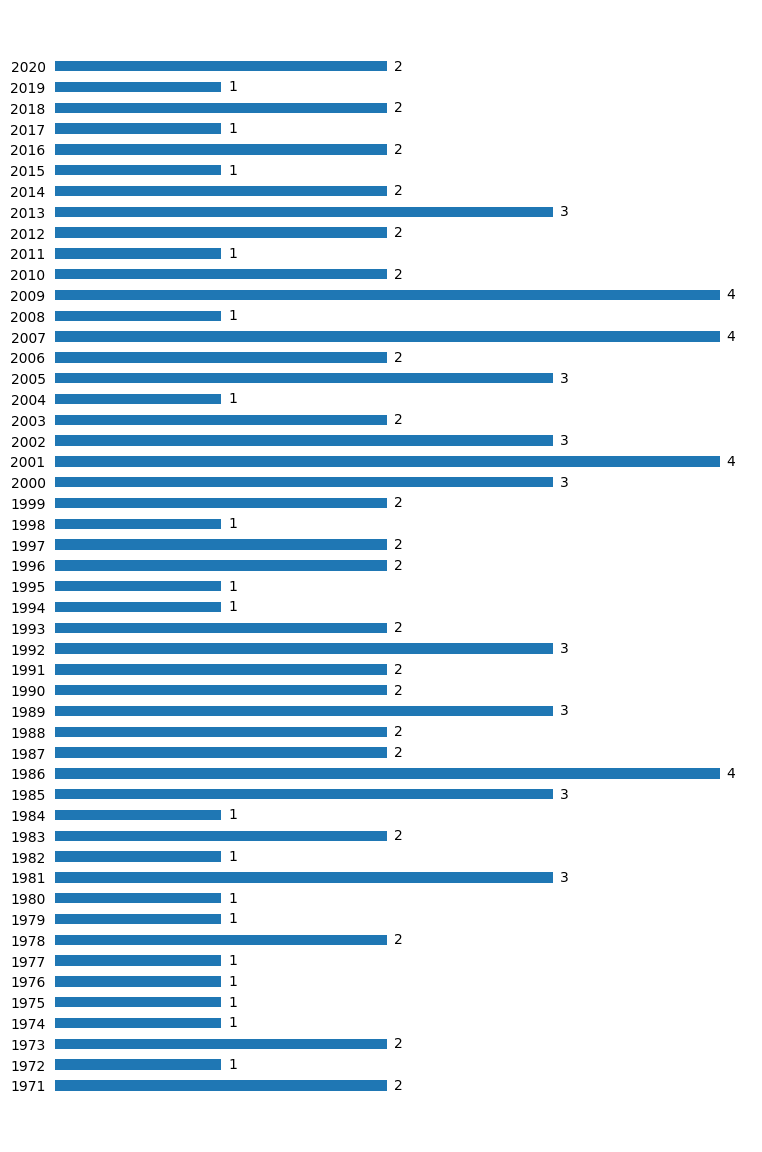

In [18]:
%matplotlib inline
barplot(attempts_per_year)

## Attempts by Country

### In which countries do the most attempted helicopter prison escapes occur?

In [19]:
countries_frequency = df["Country"].value_counts()

In [20]:
print_pretty_table(countries_frequency)

Country,Number of Occurrences
France,15
United States,8
Canada,4
Greece,4
Belgium,4
Brazil,2
United Kingdom,2
Australia,2
Ireland,1
Italy,1


## Conclusion
1)  In which year did the most helicopter prison break attempts occur? 1986, 2001, 2007 and 2009


2)  In which countries do the most attempted helicopter prison breaks occur? 
France